Loading and Exploring the Data (EDA)

Loading CSV


In [8]:
import pandas as pd

# Load data
df = pd.read_csv('student-mat.csv', sep=';')




Viewing basic info

Checking for missing values

Understanding the data types

Identifying numerical vs categorical columns

In [9]:

df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [11]:
df.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [12]:
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


Visualizing:

Correlations with G3

Distribution of grades

Categorical vs target relationships




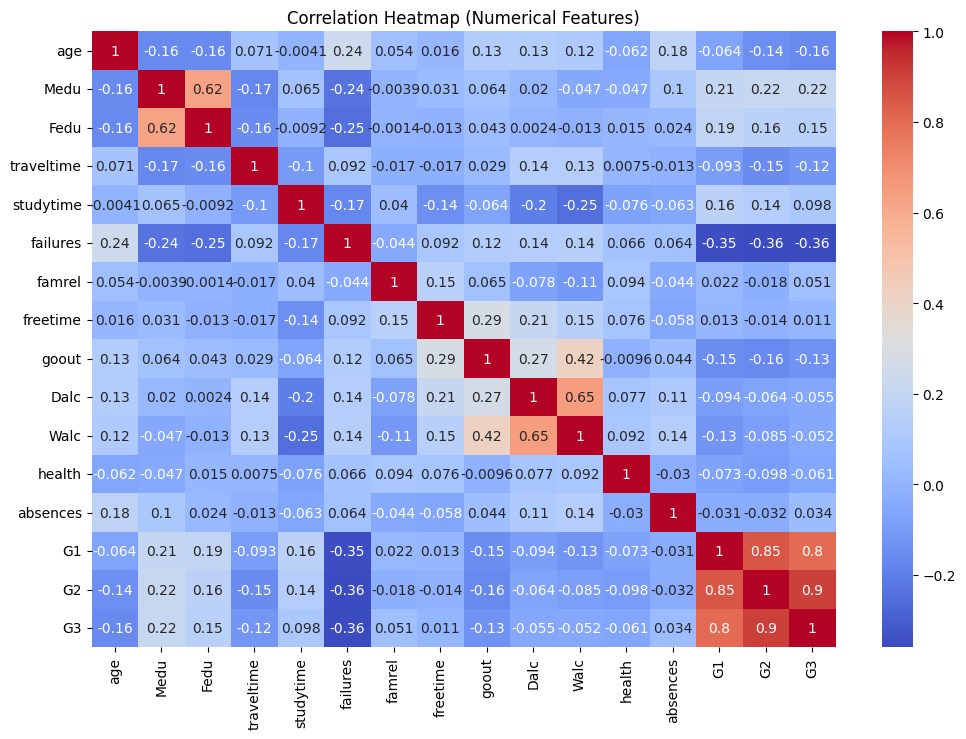

In [13]:
# Use only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

# Now plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

Convert categorical features to numeric (encoding)

Normalize/scale if needed

Drop irrelevant or redundant features

In [14]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Optional: Normalize numeric features (only if using algorithms like Logistic Regression)
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", rmse_lr)

# Train Decision Tree
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Evaluate Decision Tree
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print("Decision Tree R2:", r2_score(y_test, y_pred_tree))
print("Decision Tree RMSE:", rmse_tree)


Linear Regression R2: 0.7241341236974024
Linear Regression RMSE: 2.378369784796136
Decision Tree R2: 0.7031308891822728
Decision Tree RMSE: 2.467248497769575


Here I feel Linear Regression Model is slightly better than decision tree.


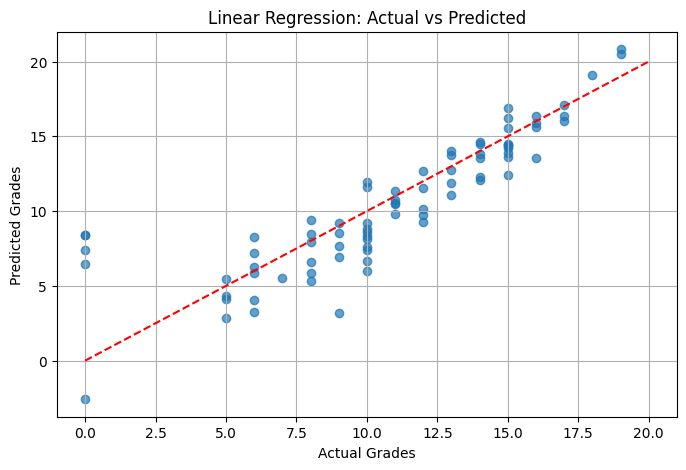

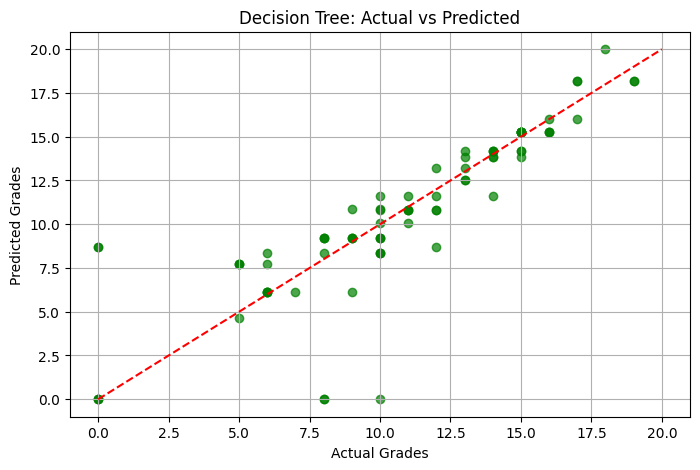

In [17]:
import matplotlib.pyplot as plt

# Plot for Linear Regression
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([0, 20], [0, 20], color='red', linestyle='--')  # 45-degree line
plt.grid(True)
plt.show()

# Plot for Decision Tree
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_tree, alpha=0.7, color='green')
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Decision Tree: Actual vs Predicted")
plt.plot([0, 20], [0, 20], color='red', linestyle='--')
plt.grid(True)
plt.show()


Features Important in Decision Tree

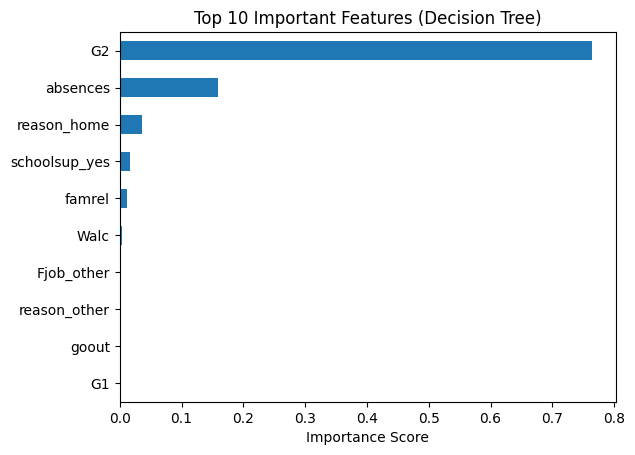

In [18]:
# Get feature importances
import pandas as pd

feature_importance = pd.Series(tree.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)

# Plot
top_features.plot(kind='barh')
plt.title("Top 10 Important Features (Decision Tree)")
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.show()


Changing the depth of the decision tree - checking the r*2 and rmse change

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("Depth | R² Score | RMSE")
for depth in range(2, 11):
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{depth:<5} | {r2:.4f}    | {rmse:.4f}")


Depth | R² Score | RMSE
2     | 0.6627    | 0.2755
3     | 0.6620    | 0.2758
4     | 0.5341    | 0.3238
5     | 0.6179    | 0.2932
6     | 0.5278    | 0.3259
7     | 0.4936    | 0.3375
8     | 0.4936    | 0.3375
9     | 0.4936    | 0.3375
10    | 0.4936    | 0.3375


Shows at depth 2 or 3 the performance is best. After 7 no change, overfitted.

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the Random Forest Regressor with 100 trees (n_estimators)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest R²:", r2_rf)
print("Random Forest RMSE:", rmse_rf)


Random Forest R²: 0.6726732905982906
Random Forest RMSE: 0.27136084621912476


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,  # Use all available cores
                           verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Use best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Evaluate
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2_best = r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print("Tuned Random Forest R²:", r2_best)
print("Tuned Random Forest RMSE:", rmse_best)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest R²: 0.6618903739341859
Tuned Random Forest RMSE: 0.2757942645621744


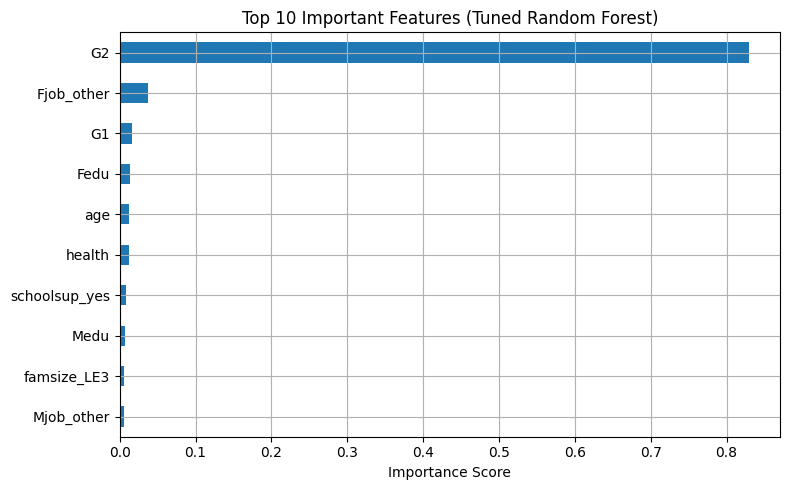

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the best model
importances = best_rf.feature_importances_

# Create a pandas Series with feature names and importances
feature_names = X.columns  # Assuming X is your original feature set
feat_importance = pd.Series(importances, index=feature_names)

# Sort and select top 10 features
top_features = feat_importance.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 5))
top_features.plot(kind='barh')
plt.title("Top 10 Important Features (Tuned Random Forest)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()  # Most important feature on top
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
# Convert to pass/fail
y_class = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Redefine features and split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df_encoded.drop('G3', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_clf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_clf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_clf))


Accuracy: 0.9240506329113924

Confusion Matrix:
 [[26  1]
 [ 5 47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90        27
           1       0.98      0.90      0.94        52

    accuracy                           0.92        79
   macro avg       0.91      0.93      0.92        79
weighted avg       0.93      0.92      0.93        79



In [25]:
!pip install gradio


Retrained Random Forest with only 5 parameters

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load your original data
df = pd.read_csv("student-mat.csv", sep=';')

# Select only the important numeric features
selected_features = ['G1', 'G2', 'studytime', 'failures', 'absences']
X_simple = df[selected_features]
y = df['G3']

# Split and train the model
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)
simple_model = RandomForestRegressor(n_estimators=100, random_state=42)
simple_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [34]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = simple_model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.8714026415629768
RMSE: 1.6238518754183187


In [35]:
import gradio as gr
import pandas as pd

def predict_grade(G1, G2, studytime, failures, absences):
    try:
        input_data = pd.DataFrame([{
            'G1': G1,
            'G2': G2,
            'studytime': studytime,
            'failures': failures,
            'absences': absences
        }])
        prediction = simple_model.predict(input_data)[0]
        return f"🎯 Predicted Final Grade (G3 out of 20): {round(prediction, 2)}"
    except Exception as e:
        return f"❌ Error: {str(e)}"

# Gradio Interface
iface = gr.Interface(
    fn=predict_grade,
    inputs=[
        gr.Slider(0, 20, step=1, label="G1 (First Exam Grade, 0–20)"),
        gr.Slider(0, 20, step=1, label="G2 (Second Exam Grade, 0–20)"),
        gr.Slider(1, 4, step=1, label="Weekly Study Time:\n1=<2hrs, 2=2–5hrs, 3=5–10hrs, 4=>10hrs"),
        gr.Slider(0, 4, step=1, label="Number of Past Failures (0–4)"),
        gr.Slider(0, 93, step=1, label="Total Absences (0–93 days)")
    ],
    outputs="text",
    title="🎓 Student Grade Predictor (Simplified)",
    description="Enter student info to predict final grade (G3) using a model trained on 5 key features."
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://37e1bde26370319df3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


From the graph above parameter G2 has the most influence on the final output.